In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import display 
import math as m
from pandas import DataFrame
from matplotlib.pyplot import figure
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/clustering_toy_data.csv")
data

,x,y
0,-0.200303,0.510281
1,-0.326642,-0.922599
2,-0.020885,-1.822650
3,-0.796312,0.618746
4,-1.290430,-1.055020
...,...,...
95,2.510740,-3.331230
96,2.424170,-2.143370
97,2.915710,-2.911060
98,2.414640,-3.687660


##k-means clustering 

In [ ]:
X = data['x']
Y = data['y']


Text(0, 0.5, 'y')

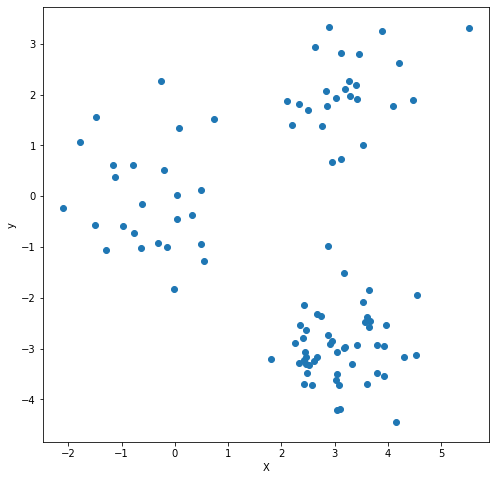

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("y")

In [ ]:
# 3 rastgele nokta seç
import random
def random_centroids(number_of_centroids, training_set_size):
    x_point = []
    y_point = []

    for i in range(number_of_centroids):
        j = random.randint(1, training_set_size-1)

        x_point.append(X[j])
        y_point.append(Y[j])

    
    centroids = {"x": x_point, "y":y_point}
    return centroids

In [ ]:
number_of_centroids = 3
centroids = random_centroids(number_of_centroids, len(X))

print(centroids)

{'x': [3.52743, 3.11366, -0.96831], 'y': [-2.07992, 0.725048, -0.583816]}


Text(0, 0.5, 'y')

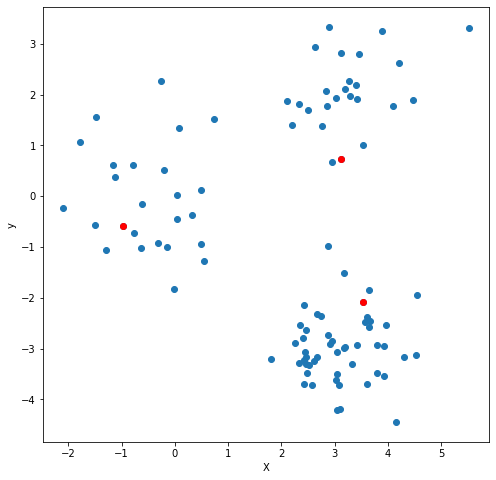

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.scatter(centroids["x"], centroids["y"], color='red')
plt.xlabel("X")
plt.ylabel("y")

In [ ]:
# her bir noktanın her bir merkezden uzaklığını bulmak
import math
def eucledian_distance(x1, y1, x2, y2):
     return math.sqrt(((x1-x2)**2) + ((y1-y2)**2))

In [ ]:
def calculate_distance_from_centroids(centroid, point_x, point_y):
    
    distances = []
    centroid_distances = {}
    for i in range(len(centroid["x"])):
        for j in range(len(X)):

            distances.append(eucledian_distance(centroid["x"][i], centroid["y"][i], point_x[j], point_y[j]))
                        
        centroid_distances[i] = distances
        distances = []
    return centroid_distances

In [ ]:
# Bu işlev, her küme noktasının ortalama mesafesini alır
def mean_distance_cluster(df, x, y):
    return df.groupby("cluster").mean()[["x", "y"]]

In [ ]:
# Bu ana k means işlevidir
def kmeans(centroids, x, y):
    diff = 1
    i = 0
    while (diff!=0):
        centroid_distances = calculate_distance_from_centroids(centroids, x, y)
        df = pd.DataFrame()
        df.iloc[0:0]
        df = pd.DataFrame(calculate_distance_from_centroids(centroids, X, y))
        
        df['cluster'] = df.idxmin(axis=1)
        df["x"] = x
        df["y"] = y
        
        new_centroids = mean_distance_cluster(df, x, y)
        
        diff = (new_centroids["x"] - centroids["x"]).sum() + (new_centroids["y"] - centroids["y"]).sum()
        print(diff)
        centroids = new_centroids
     
        i+=1
        
    return df

0.9174581600000008
0.23375459599999976
0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


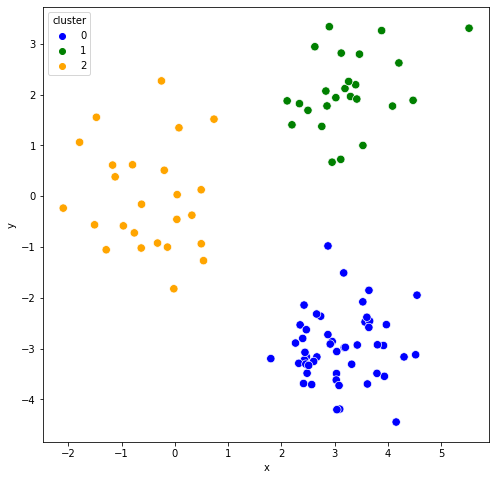

In [ ]:
df_new = kmeans(centroids, X, Y)
plt.figure(figsize=(8, 8))
sns.scatterplot(df_new['x'], df_new['y'], hue=df_new['cluster'], palette=["blue", "green", "orange"], s=70)